<a href="https://colab.research.google.com/github/Ajay-user/ML-DL-RL-repo/blob/master/Working%20with%20images/Image_segmentation_using_Kmeans_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# Clustering of unlabeled data can be performed with the module sklearn.cluster.
from sklearn.cluster import KMeans
# for printing arrays
import sympy
sympy.init_printing()

## Loading the image

In [90]:
# author : https://unsplash.com/@jeroendenotter
url = 'https://images.unsplash.com/photo-1517157488732-b80ab10430e4?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80'
path = tf.keras.utils.get_file(origin=url)

90112/80439 [=================================] - 0s 0us/step


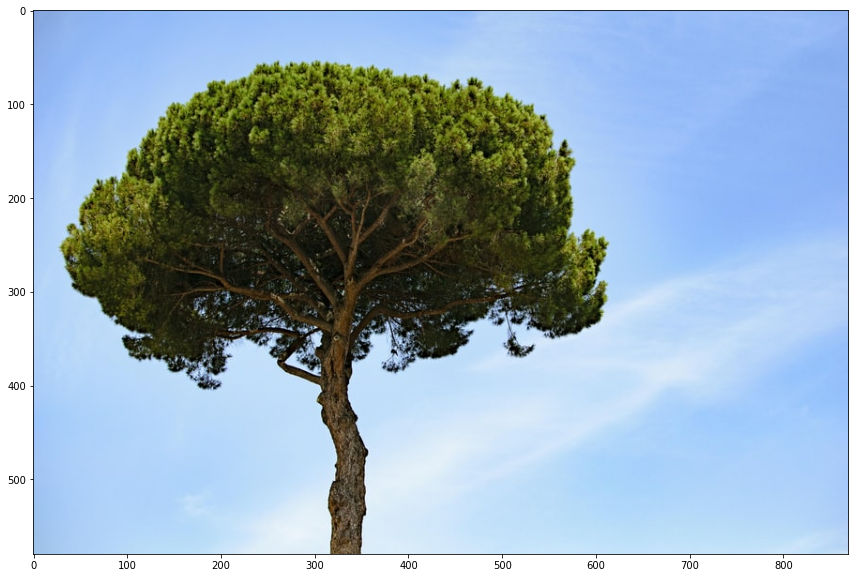

In [97]:
# Reads the contents of file.
raw = tf.io.read_file(path)
# Decode a JPEG-encoded image to a uint8 tensor.
img = tf.image.decode_jpeg(raw,channels=3)
# Visualize
plt.figure(figsize=(15,10))
plt.imshow(img);

The input image is 3D

The sklearn's kmeans takes as input a 2D matrix having shape = (n_samples, n_feature)

So lets reshape  the image

In [61]:
# shape of image
print('The shape of image',img.shape)
# ouput : The shape of image (Width, Height, Depth)

The shape of image (580, 435, 3)


In [98]:
reshaped_image = img.numpy().reshape(-1,3)

## Clustering

Clustering simply means the assigning of data points to groups based upon how similar the points are to each other. 

A clustering algorithm makes "birds of a feather flock together"

K-means clustering measures similarity using ordinary straight-line distance (Euclidean distance, in other words). It creates clusters by placing a number of points, called centroids, inside the feature-space. Each point in the dataset is assigned to the cluster of whichever centroid it's closest to. The "k" in "k-means" is how many centroids (clusters) it creates. You define the k yourself.

You could imagine each centroid capturing points through a sequence of radiating circles. When sets of circles from competing centroids overlap they form a line. The result is what's called a Voronoi tessallation. The tessallation shows you to what clusters future data will be assigned; the tessallation is essentially what k-means learns from its training data.

The algorithm starts by randomly initializing some predefined number (n_clusters) of centroids. It then iterates over these two operations:

* assign points to the nearest cluster centroid
* move each centroid to minimize the distance to its points

It iterates over these two steps until the centroids aren't moving anymore, or until some maximum number of iterations has passed (max_iter).

It often happens that the initial random position of the centroids ends in a poor clustering. For this reason the algorithm repeats a number of times (n_init) and returns the clustering that has the least total distance between each point and its centroid, the optimal clustering.
 
 ```
class sklearn.cluster.KMeans(n_clusters=3, n_init=10, max_iter=300)
 ```

In [99]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(reshaped_image)

KMeans(n_clusters=4)

The centroids -- the clustering algorithm learned

In [100]:
import sympy
sympy.init_printing()

sympy.Matrix(kmeans.cluster_centers_)

⎡189.529691676475  219.255975052133  249.150754408685⎤
⎢                                                    ⎥
⎢39.4887984470236  40.0606262365717  16.3916370492245⎥
⎢                                                    ⎥
⎢101.172211769752  106.568696563397  48.2015766033707⎥
⎢                                                    ⎥
⎣155.415007778085  192.509353494826  245.77678171221 ⎦

Now let's segment the image by clustering

In [101]:
# Compute cluster centers and predict cluster index/label for each sample.
segments = kmeans.predict(reshaped_image)

In [102]:
segmented_image = kmeans.cluster_centers_[segments]

Let's visualize the image segements 

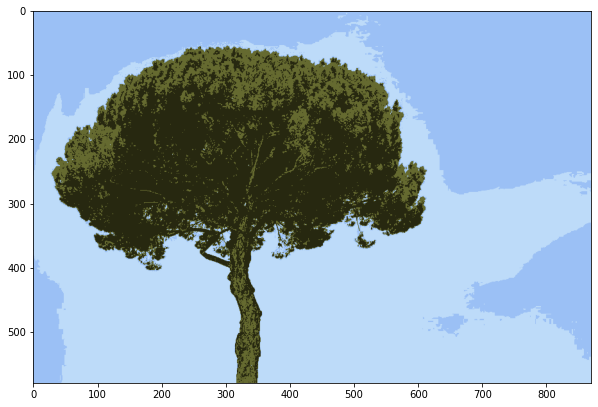

In [103]:
# lets reshape the image: 2D to 3D
segmented_image = segmented_image.reshape(img.numpy().shape)
# let's convert them back to 8-bit pixel values
segmented_image = tf.cast(segmented_image, dtype=tf.uint8)
# visualize
plt.figure(figsize=(10,10))
plt.imshow(segmented_image);

### Utility for image segmentation using kmeans

In [73]:
def image_segmentation(image_url, clusters=4, n_init=10, max_iter=300, figsize=(15,15)):
  # download the image
  path = tf.keras.utils.get_file(origin=image_url)
  raw = tf.io.read_file(path)
  img = tf.image.decode_jpeg(raw, channels=3)

  # reshape the image
  reshaped_image = img.numpy().reshape(-1,3)
  kmeans = KMeans(n_clusters=clusters, n_init=n_init, max_iter=max_iter)
  kmeans.fit(reshaped_image)

  # cluster center
  centroid = kmeans.cluster_centers_
  # cluster index/label for each sample.
  segments = kmeans.predict(reshaped_image)
  segmented_image = kmeans.cluster_centers_[segments]

  # let's reshape and convert them back to 8-bit pixel values
  segmented_image = segmented_image.reshape(img.numpy().shape)
  segmented_image = tf.cast(segmented_image, dtype=tf.uint8)

  plt.figure(figsize=figsize)
  plt.subplot(1,2,1)
  plt.imshow(img)
  plt.title('Original image')
  plt.subplot(1,2,2)
  plt.imshow(segmented_image);
  plt.title('Kmeans clusters')



196608/187774 [===============================] - 0s 0us/step


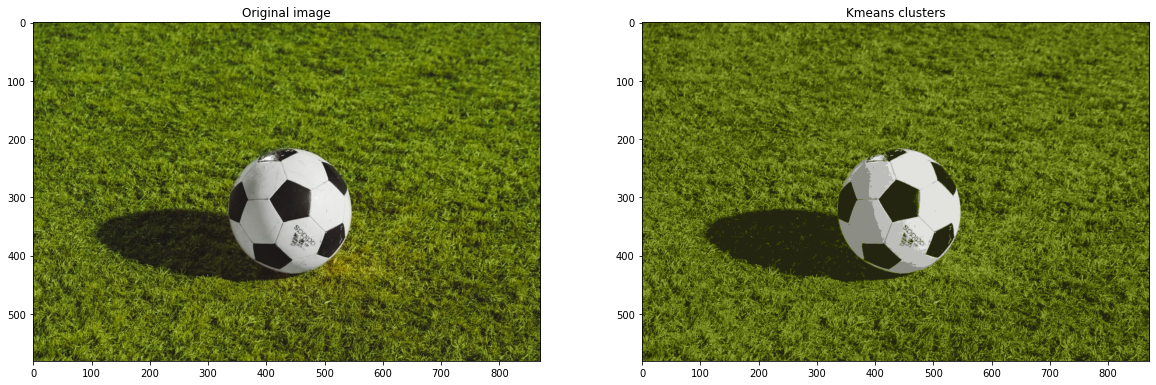

In [81]:
# https://unsplash.com/@wesleyphotography
url="https://images.unsplash.com/photo-1575361204480-aadea25e6e68?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=871&q=80"
image_segmentation(image_url=url, clusters=10, n_init=10, max_iter=300, figsize=(20,20))

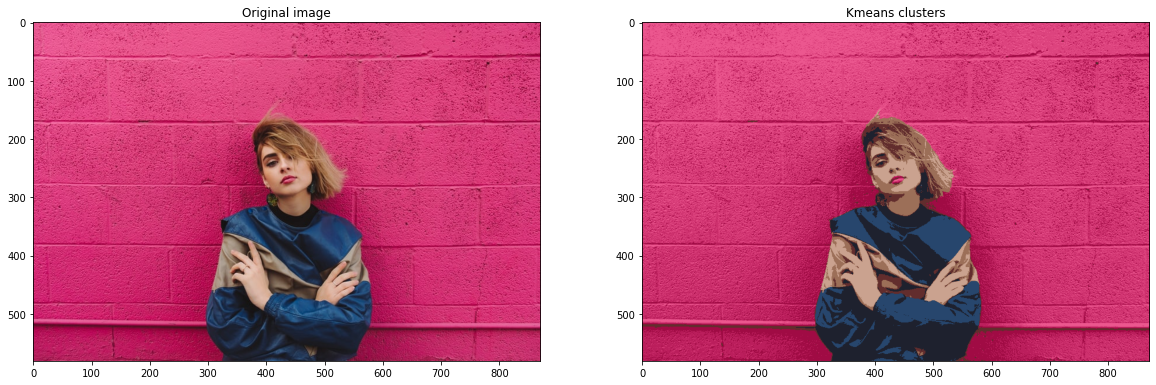

In [80]:
# author : https://unsplash.com/@wesleyphotography
url = "https://images.unsplash.com/photo-1575939238474-c8ada13b2724?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=871&q=80"
image_segmentation(image_url=url, clusters=10, n_init=10, max_iter=300, figsize=(20,20))

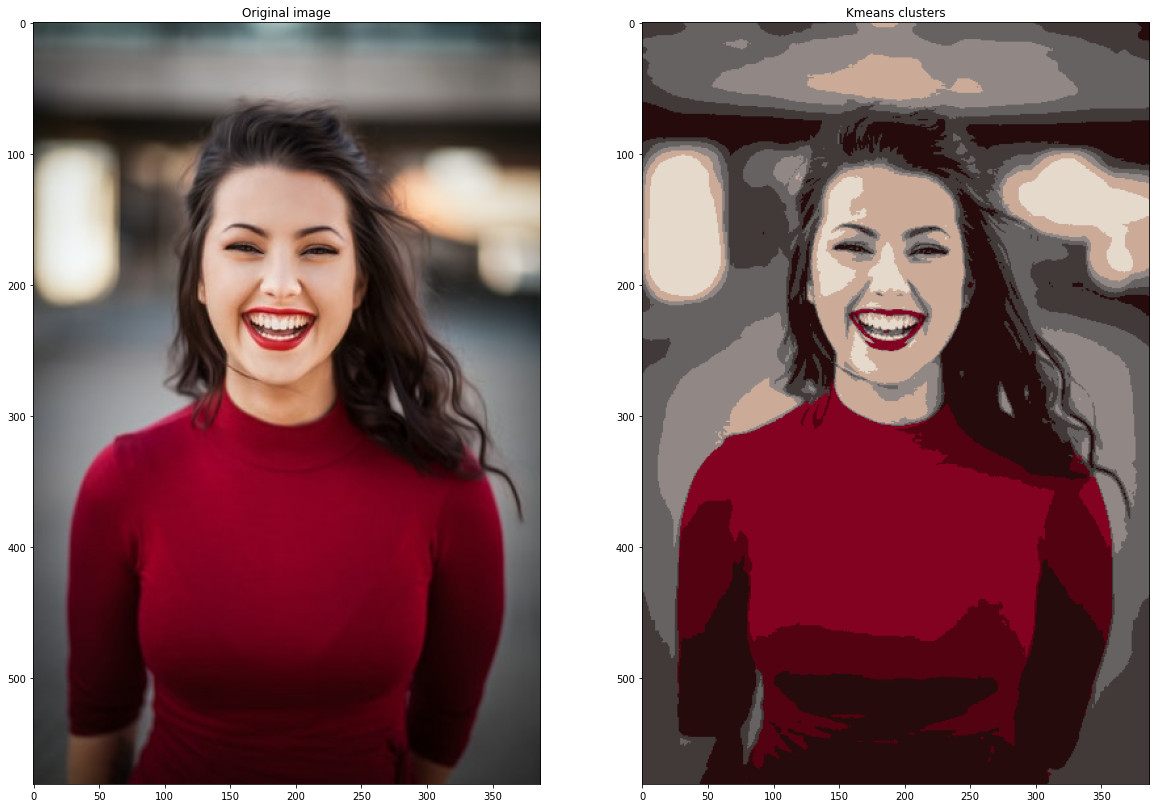

In [77]:
# author : https://unsplash.com/@michaeldam
url = 'https://images.unsplash.com/photo-1494790108377-be9c29b29330?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=387&q=80'
image_segmentation(image_url=url, clusters=8, n_init=10, max_iter=300, figsize=(20,20))